In [1]:
!python --version

Python 3.10.6


In [2]:
!pip uninstall keras -y
!pip uninstall tensorflow -y

Found existing installation: keras 2.13.1
Uninstalling keras-2.13.1:
  Successfully uninstalled keras-2.13.1
Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0


In [3]:
!pip install numpy pandas scikit-learn tensorflowjs

  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/k4u5h4L/whatsmyworth.git

fatal: destination path 'whatsmyworth' already exists and is not an empty directory.


In [6]:
df = pd.read_csv('./whatsmyworth/data/Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [7]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [8]:
print(len(df))
df = df.dropna()
print(len(df))

6704
6698


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
print(df['Gender'].unique())
df['Gender']= label_encoder.fit_transform(df['Gender'])
print(df['Gender'].unique())

['Male' 'Female' 'Other']
[1 0 2]


In [11]:
print(df['Education Level'].unique())
df['Education Level']= label_encoder.fit_transform(df['Education Level'])
print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
[0 3 5 1 4 2 6]


In [12]:
print(df['Job Title'].unique())
df['Job Title']= label_encoder.fit_transform(df['Job Title'])
print(df['Job Title'].unique())

['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marketing' 'Help Desk Analyst' 'Customer Service Manager'
 'Business Intelligence Analyst' 'Event Coordinator' 'VP of Finance'
 'G

In [13]:
print(df['Country'].unique())
df['Country']= label_encoder.fit_transform(df['Country'])
print(df['Country'].unique())

['UK' 'USA' 'Canada' 'China' 'Australia']
[3 4 1 2 0]


In [14]:
print(df['Race'].unique())
df['Race']= label_encoder.fit_transform(df['Race'])
print(df['Race'].unique())

['White' 'Hispanic' 'Asian' 'Korean' 'Chinese' 'Australian' 'Welsh'
 'African American' 'Mixed' 'Black']
[9 5 1 6 4 2 8 0 7 3]


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1337)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
input_shape = X_train.shape[1]

In [18]:
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(input_shape,)))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1821 (7.11 KB)
Trainable params: 1821 (7.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [21]:
num_epochs = 50
history = model.fit(X_train, y_train,
                    epochs=num_epochs,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[early_stop]
          )

Epoch 1/50
168/168 [==============================] - 2s 4ms/step - loss: 15925754880.0000 - mae: 114565.6875 - val_loss: 14703863808.0000 - val_mae: 109733.3281
Epoch 2/50
168/168 [==============================] - 1s 3ms/step - loss: 13029728256.0000 - mae: 101318.8047 - val_loss: 9713691648.0000 - val_mae: 84674.5312
Epoch 3/50
168/168 [==============================] - 1s 3ms/step - loss: 6942072320.0000 - mae: 68512.4297 - val_loss: 4442262016.0000 - val_mae: 54443.9883
Epoch 4/50
168/168 [==============================] - 0s 2ms/step - loss: 3842982912.0000 - mae: 50501.5469 - val_loss: 3451662592.0000 - val_mae: 47868.5625
Epoch 5/50
168/168 [==============================] - 0s 2ms/step - loss: 3359221760.0000 - mae: 47010.7344 - val_loss: 3112385024.0000 - val_mae: 45554.0703
Epoch 6/50
168/168 [==============================] - 0s 2ms/step - loss: 3007812352.0000 - mae: 44615.2344 - val_loss: 2740730880.0000 - val_mae: 42840.5508
Epoch 7/50
168/168 [==========================

In [22]:
pred = model.predict(X_test)

42/42 [==============================] - 0s 2ms/step


In [23]:
inp = X_test.iloc[0]
# pred1 = model.predict(inp)
inp

Age                    26.0
Gender                  0.0
Education Level         3.0
Job Title              64.0
Years of Experience     1.5
Country                 1.0
Race                    1.0
Name: 174, dtype: float64

In [24]:
model.predict([[26.0, 0.0, 3.0, 64.0, 1.5, 1.0, 1.0]])

1/1 [==============================] - 0s 129ms/step


array([[71342.38]], dtype=float32)

In [25]:
pred[0]

array([71342.39], dtype=float32)

In [26]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

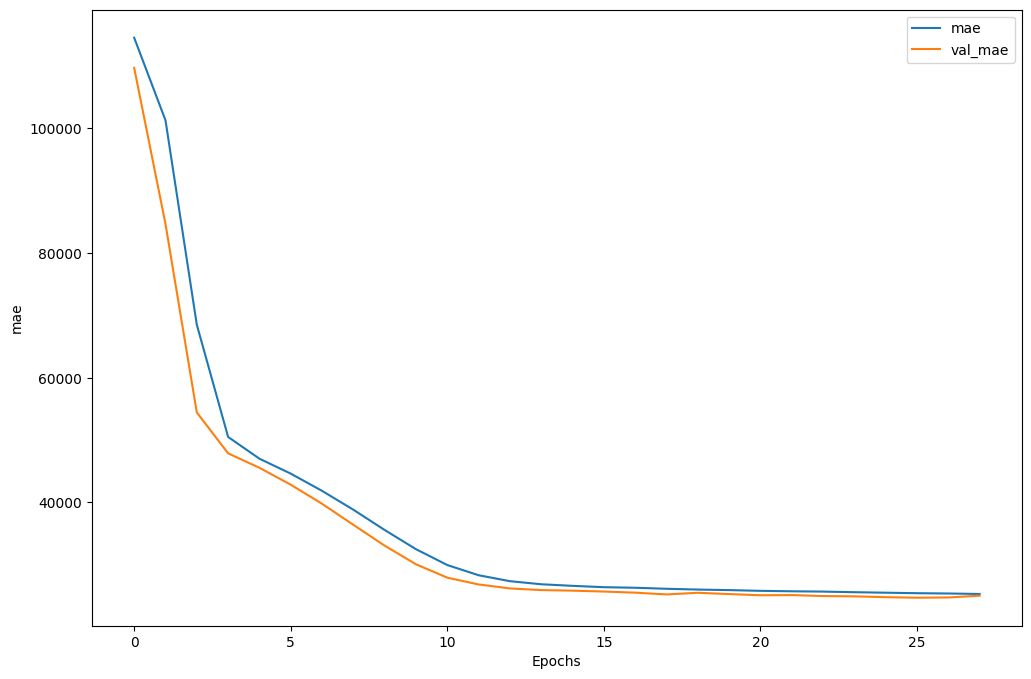

In [27]:
plt.figure(figsize=(12, 8))

plot_graphs(history, "mae")

In [28]:
model.save('whatsmyworth_model.keras')

In [29]:
print("HELLO")

HELLO


In [30]:
import tensorflowjs as tfjs

In [31]:
tfjs.converters.save_keras_model(model, "./tfjs_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
